# TASK 6.5 Clustering: Unsupervised Machine Learning

## This Script contains the following:
### 1. Importing Libraries, Data and Renaming columns
### 2. The Elbow Technique 
### 3. k-means clustering

### Importing Libraries and Data and Renaming columns

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
from sklearn.preprocessing import StandardScaler #standard scaler for standardizing the data
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# Ensuring that the graphs are displayed within the Notebook
%matplotlib inline

In [3]:
# Defining the path
path = r'C:\Users\user\Waiting times for priority procedures'


In [4]:
path

'C:\\Users\\user\\Waiting times for priority procedures'

In [5]:
# importing the dataset
df = pd.read_csv(os.path.join(path,'1.Data', 'Prepared data','wait_time_Transformed.csv' ))

In [6]:
df.shape

(1487, 7)

In [7]:
df.head()

,state,medical_procedure,year,%meeting_benchmark,50th_percentile_days,90th_percentile_days,total_cases
0,Alberta,Bladder Cancer Surgery,2013,NA,28,57,477
1,Alberta,Bladder Cancer Surgery,2014,NA,29,64,488
2,Alberta,Bladder Cancer Surgery,2015,NA,28,70,542
3,Alberta,Bladder Cancer Surgery,2016,NA,30,70,448
4,Alberta,Bladder Cancer Surgery,2017,NA,30,69,573


In [8]:
#changing column heads
df.rename(columns = {'50th_percentile_days':'median_days','90th_percentile_days':'maximum_days'},inplace=True)

In [9]:
df.head()

,state,medical_procedure,year,%meeting_benchmark,median_days,maximum_days,total_cases
0,Alberta,Bladder Cancer Surgery,2013,NA,28,57,477
1,Alberta,Bladder Cancer Surgery,2014,NA,29,64,488
2,Alberta,Bladder Cancer Surgery,2015,NA,28,70,542
3,Alberta,Bladder Cancer Surgery,2016,NA,30,70,448
4,Alberta,Bladder Cancer Surgery,2017,NA,30,69,573


In [10]:
#removing categorical column from the data. Since, Kmeans cannot handle categorical variables
df_km = df[['year','median_days','maximum_days','total_cases']]

In [11]:
df_km.head()

,year,median_days,maximum_days,total_cases
0,2013,28,57,477
1,2014,29,64,488
2,2015,28,70,542
3,2016,30,70,448
4,2017,30,69,573


In [12]:
# standardizing the data
scaler = StandardScaler()
df_km_std = scaler.fit_transform(df_km)

In [13]:
df_km_std.shape

(1487, 4)

## 2.Elbow technique

In [14]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [15]:
score = [kmeans[i].fit(df_km_std).score(df_km_std) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


[-5948.0,
 -3820.361748436214,
 -2692.206793700908,
 -1911.9731485203822,
 -1493.8809837114036,
 -1256.1832126695033,
 -1093.7319132281816,
 -952.7967756033245,
 -854.4528994349691]

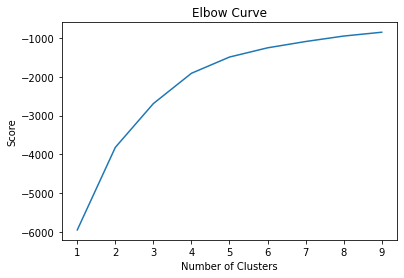

In [16]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### From the Elbow plot we can see that the last jump is between 3 and 4 after which the curve seems to flatten out.
#### Hence we shall take 3 clusters for our analysis

## 3. K-means clustering

In [17]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3)

In [18]:
# Fit the k-means object to the data.

kmeans.fit(df_km_std)

KMeans(n_clusters=3)

In [19]:
df_km['clusters'] = kmeans.fit_predict(df_km)

C:\Users\user\AppData\Local\Temp\ipykernel_12972\1817966743.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_km['clusters'] = kmeans.fit_predict(df_km)


In [20]:
df_km.head()

,year,median_days,maximum_days,total_cases,clusters
0,2013,28,57,477,0
1,2014,29,64,488,0
2,2015,28,70,542,0
3,2016,30,70,448,0
4,2017,30,69,573,0


In [24]:
df_km['clusters'].value_counts()

0    1437
2      39
1      11
Name: clusters, dtype: int64

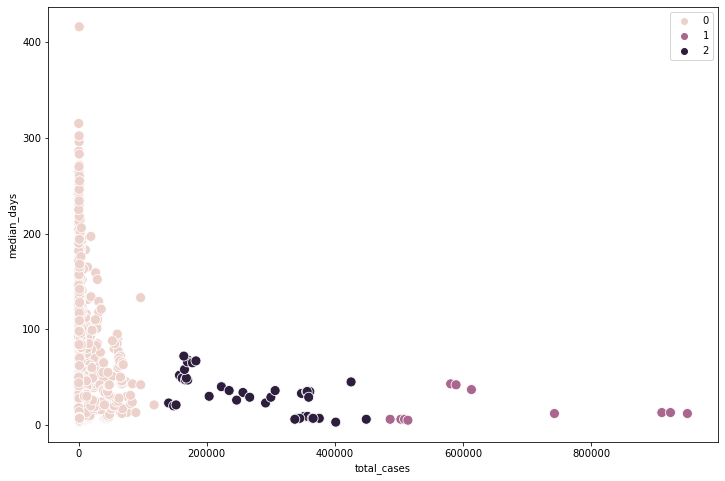

In [25]:
# Plot the clusters for the "total_cases" and "median_days" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_km['total_cases'], y=df_km['median_days'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('total_cases') # Label x-axis.
plt.ylabel('median_days') # Label y-axis.
plt.show()

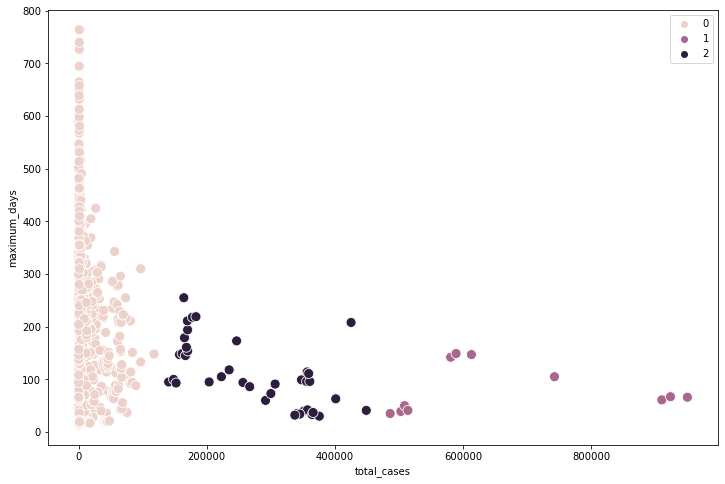

In [26]:
# Plot the clusters for the "maximum days" and "total cases" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_km['total_cases'], y=df_km['maximum_days'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('total_cases') 
plt.ylabel('maximum_days') 
plt.show()

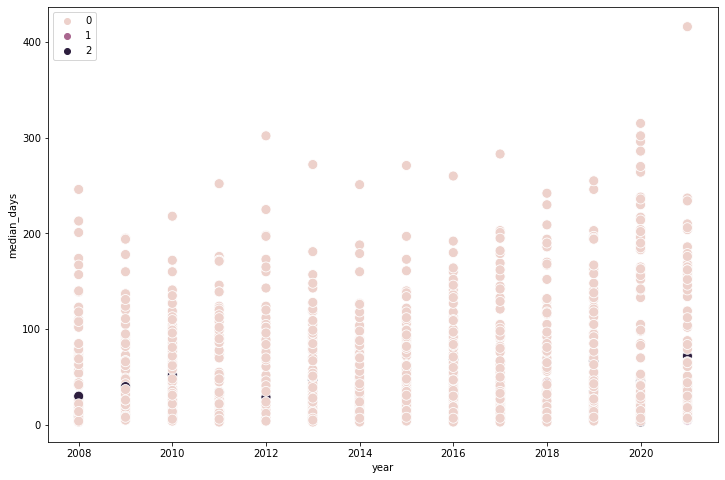

In [27]:
# Plot the clusters for the "year" and "median_days" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_km['year'], y=df_km['median_days'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('year') 
plt.ylabel('median_days') 
plt.show()

In [28]:
df_km.loc[df_km['clusters'] == 0, 'cluster'] = 'pink'
df_km.loc[df_km['clusters'] == 1, 'cluster'] = 'purple'
df_km.loc[df_km['clusters'] == 2, 'cluster'] = 'dark purple'

C:\Users\user\AppData\Local\Temp\ipykernel_12972\1564273420.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_km.loc[df_km['clusters'] == 0, 'cluster'] = 'pink'


In [29]:
df_km.groupby('cluster').agg({'median_days':['mean', 'median'], 
                         'maximum_days':['mean', 'median'], 
                         'total_cases':['mean', 'median']})

median_days        maximum_days           total_cases          
                   mean median         mean median           mean    median
cluster                                                                    
dark purple   32.487179   33.0   110.923077   96.0  269602.051282  266893.0
pink          52.466249   26.0   137.411969   69.0    6802.657620    1202.0
purple        17.727273   12.0    82.000000   66.0  665356.909091  588906.0

#### The purple cluster is the most effective because inspite of having extremely high number of cases the 'median and maximum waiting' times for this cluster was extremely low.. 

#### The pink cluster is an inconsistently performing group because inspite of having very less "total cases", the median and maximum waiting times are extremely high. This pink cluster needs to be further investigated to identify the root cause.

#### The last plot answer some questions for us. it is obvious that majority of observations belong to the pink cluster. 
#### The plot of "year" against "median days"shows that the 'median waiting days' follow a pattern. They gradually started rising from 2018 and were the highest for the years 2019 and 2020 which corresponds to the Covid -19 pandemic.
#### The waiting time has notably reduced in 2021 which is the post-covid period.

### We can say that the increase in the median waiting times for priority procedures can be attributed to the covid pandemic, partly because of shutting down of some faculties and diversion of resources towards handling of the Covid crisis.